# **TASK:1   Exploratory DATA ANALYSIS OF Himalayan States of India**

Introduction:

In this task  analysis of data from moja global datasets was performed.


*   The indo-himalayan region include the following states of India:
###Jammu & Kashmir, Himachal Pradesh, Uttarakhand, Sikkim, Arunachal Pradesh, Assam, Bihar, West Bengal (partially, especially the areas of Darjeeling and Kalimpong)


*   The Indo-Himalayan region, stretching across the northern boundary of the Indian subcontinent, encompasses a diverse array of ecosystems, from tropical rainforests in the foothills to alpine meadows at higher altitudes. This region is one of the biodiversity hotspots in the world, and its unique geographical location and varied climatic conditions make it a reservoir of rich biodiversity.


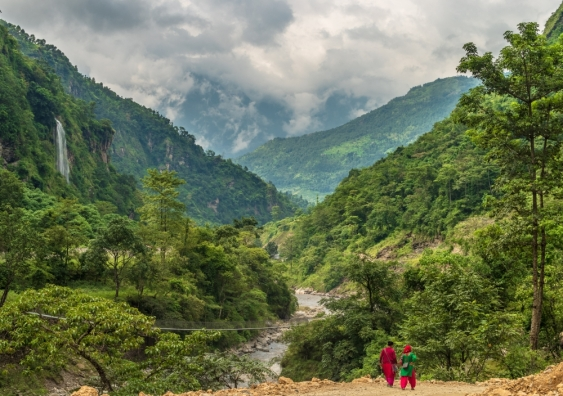












In [ ]:
# install and import condalab, run twice.
!pip install -q condacolab -q

In [ ]:
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


# Initialize **libraries**

In [ ]:

# Import all necessary libraries
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline



In [ ]:
# Mounting the google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.  Functions defined and used

In [ ]:
def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)

def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)

#2. administrative boundaries

In [ ]:
# Loading the administraive boundaries of India
ind_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India.json")

# Read geojson file into a geodataframe
ind_df = gpd.read_file(ind_df)
ind_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,India,India,India,,administrative,2,Q668,hi:भारत,2019-10-02 22:56:03,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."


In [ ]:
# Checking the data frame size and shape
ind_df.shape

(1, 12)

In [ ]:
# Loading the administraive boundaries of Indian states
ind_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_ALL_states.json")
# Read geojson file into a geodataframe
ind_state_df = gpd.read_file(ind_state_df)
ind_state_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AN,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Andaman and Nicobar Islands,Union Territory of Andaman and Nicobar Islands,administrative,4,Q40888,en:Andaman and Nicobar Islands,2019-09-29 22:07:01,"MULTIPOLYGON (((93.94419 6.99219, 93.94419 6.9..."
1,IND,IN-AP,Andhra Pradesh,Andhra Pradesh,Andhra Pradesh,,administrative,4,Q1159,en:Andhra Pradesh,2019-10-04 22:35:01,"MULTIPOLYGON (((76.76365 14.98503, 76.76736 14..."
2,IND,IN-AR,Arunachal Pradesh,Arunachal Pradesh,Arunachal Pradesh,,administrative,4,Q1162,en:Arunachal Pradesh,2019-09-28 22:16:02,"POLYGON ((91.56231 27.63221, 91.56233 27.63145..."
3,IND,IN-AS,Assam,Assam,Assam,,administrative,4,Q1164,en:Assam,2019-09-28 22:16:02,"POLYGON ((95.94798 27.93723, 95.94870 27.93796..."
4,IND,IN-BR,Bihar,Bihar,Bihar,,administrative,4,Q1165,en:Bihar,2019-10-01 22:00:02,"POLYGON ((83.32126 25.02036, 83.32147 25.01803..."
5,IND,IN-CH,Chandigarh,Chandigarh,Chandigarh,,administrative,4,Q43433,en:Chandigarh,2019-09-28 22:16:02,"POLYGON ((76.70499 30.75651, 76.70566 30.75556..."
6,IND,IN-CT,Chhattisgarh,Chhattisgarh,Chhattisgarh,,administrative,4,Q1168,en:Chhattisgarh,2019-10-04 22:35:01,"POLYGON ((80.24418 18.75703, 80.24862 18.75310..."
7,IND,IN-DN,Dadra and Nagar Haveli,Dadra and Nagar Haveli,Dadra and Nagar Haveli,,administrative,4,Q46107,en:Dadra and Nagar Haveli,2019-09-28 22:16:02,"MULTIPOLYGON (((72.93205 20.32202, 72.93412 20..."
8,IND,IN-DD,Daman and Diu,Daman and Diu,Daman and Diu,,administrative,4,Q66710,en:Daman and Diu,2019-09-28 22:16:02,"MULTIPOLYGON (((72.82131 20.37099, 72.82141 20..."
9,IND,IN-DL,Delhi,Delhi,Delhi,,administrative,4,Q1353,en:Delhi,2019-09-28 22:16:02,"POLYGON ((76.83884 28.57323, 76.83889 28.57266..."


In [ ]:
# Loading the administraive boundaries of  Himachal Pradesh state
hima_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Himachal Pradesh.json")
# Read geojson file into a geodataframe
hima_state_df = gpd.read_file(hima_state_df)
hima_state_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-HP,Himachal Pradesh,Himachal Pradesh,Himachal Pradesh,,administrative,4,Q1177,en:Himachal Pradesh,2019-09-28 22:16:02,"POLYGON ((75.58615 32.08110, 75.59401 32.07734..."


In [ ]:
# Loading the administraive boundaries of  Arunachal Pradesh state
aruna_state_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Arunachal Pradesh.json")
# Read geojson file into a geodataframe
aruna_state_df = gpd.read_file(aruna_state_df)
aruna_state_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AR,Arunachal Pradesh,Arunachal Pradesh,Arunachal Pradesh,,administrative,4,Q1162,en:Arunachal Pradesh,2019-09-28 22:16:02,"POLYGON ((91.56231 27.63221, 91.56233 27.63145..."


In [ ]:
# Loading the administraive boundaries of  Arunachal Pradesh state
JK_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Jammu and Kashmir.json")
# Read geojson file into a geodataframe
JK_df = gpd.read_file(JK_df)
JK_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-JK,Jammu and Kashmir,Jammu and Kashmir,Jammu and Kashmir,,administrative,4,Q1180,en:Jammu and Kashmir,2019-09-28 22:16:02,"POLYGON ((73.75003 34.34408, 73.75035 34.34397..."


In [ ]:
# Loading the administraive boundaries of  Uttarakhand state
uttra_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttarakhand.json")
# Read geojson file into a geodataframe
uttra_df = gpd.read_file(uttra_df)
uttra_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,,Uttarakhand,,Uttarakhand,,administrative,4,,,2019-09-28 22:16:02,"POLYGON ((77.57133 30.40925, 77.57532 30.39771..."


In [ ]:
# Loading the administraive boundaries of Sikkim state
sikki_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Sikkim.json")
# Read geojson file into a geodataframe
sikki_df = gpd.read_file(sikki_df)
sikki_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-SK,Sikkim,Sikkim,Sikkim,State of Sikkim,administrative,4,Q1505,en:Sikkim,2019-09-28 22:16:02,"POLYGON ((88.01203 27.21621, 88.01204 27.21595..."


In [ ]:
# Loading the administraive boundaries of Assam state
assam_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Assam.json")
# Read geojson file into a geodataframe
assam_df = gpd.read_file(assam_df)
assam_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-AS,Assam,Assam,Assam,,administrative,4,Q1164,en:Assam,2019-09-28 22:16:02,"POLYGON ((95.94798 27.93723, 95.94870 27.93796..."


In [ ]:
# Loading the administraive boundaries of Uttar Pradesh state
UP_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Uttar Pradesh.json")
# Read geojson file into a geodataframe
UP_df = gpd.read_file(UP_df)
UP_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-UP,Uttar Pradesh,Uttar Pradesh,Uttar Pradesh,,administrative,4,Q1498,en:Uttar Pradesh,2019-09-28 22:16:02,"POLYGON ((77.08388 29.58740, 77.08467 29.58439..."


In [ ]:
# Loading the administraive boundaries of Bihar state
bihar_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_Bihar.json")
# Read geojson file into a geodataframe
bihar_df = gpd.read_file(bihar_df)
bihar_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-BR,Bihar,Bihar,Bihar,,administrative,4,Q1165,en:Bihar,2019-10-01 22:00:02,"POLYGON ((83.32126 25.02036, 83.32147 25.01803..."


In [ ]:
# Loading the administraive boundaries of West Bengal state
west_beng_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level4 by State/IND/IND_AL4_West Bengal.json")
# Read geojson file into a geodatafram
west_beng_df = gpd.read_file(west_beng_df)
west_beng_df

,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,geometry
0,IND,IN-WB,West Bengal,West Bengal,West Bengal,,administrative,4,Q1356,en:West Bengal,2019-10-04 22:35:01,"MULTIPOLYGON (((88.06765 27.19043, 88.07479 27..."


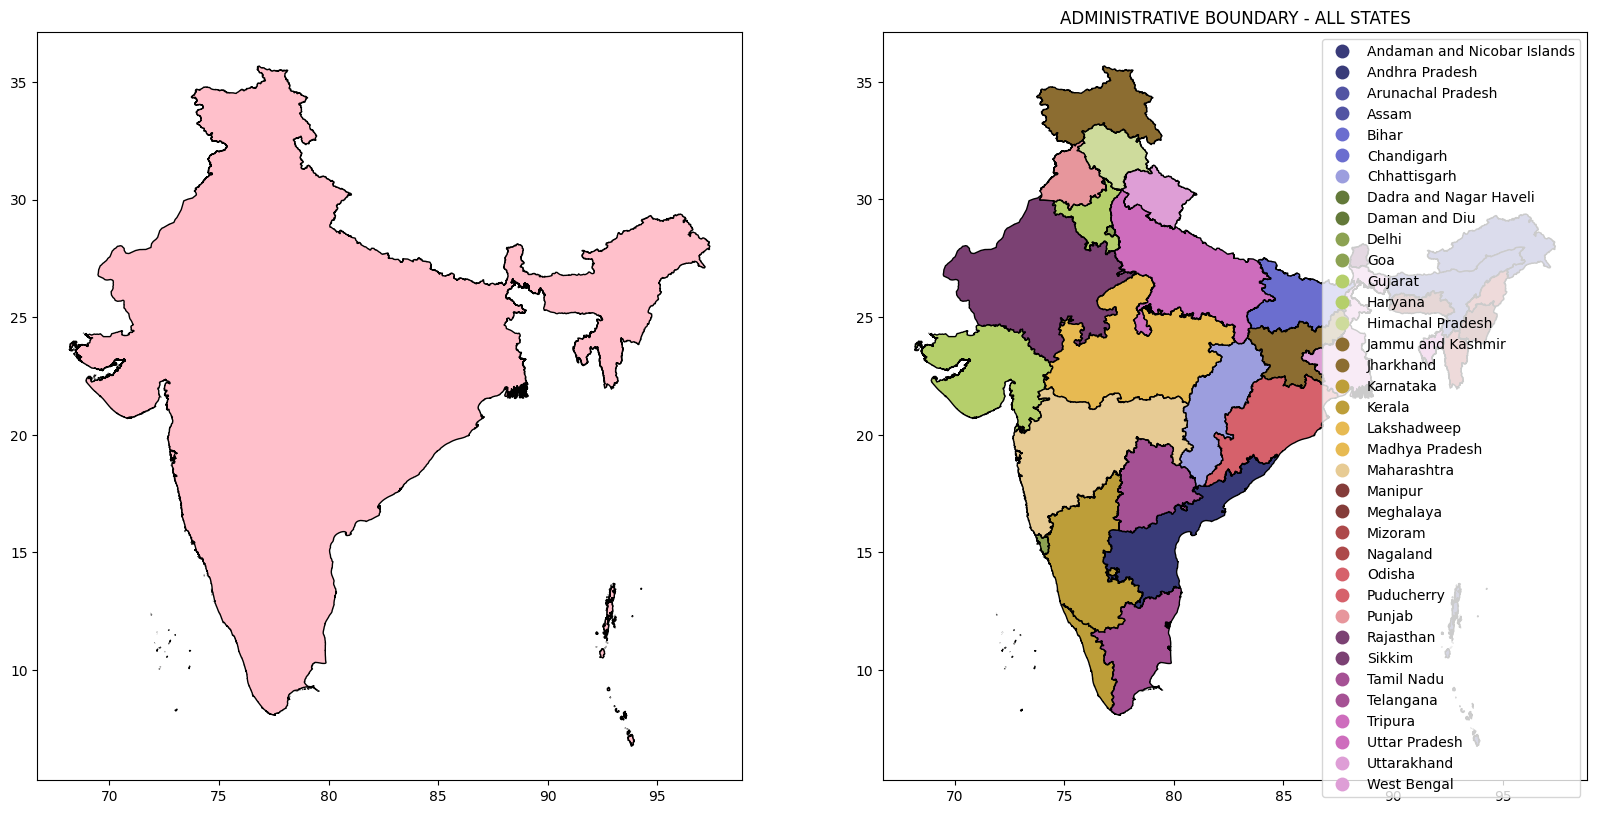

In [ ]:

# Creating adminitrative plot of India
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

ind_df.plot(ax=ax1, color="pink", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY ")

ind_state_df.plot(ax=ax2, edgecolor="black",column='name', cmap = 'tab20b', legend=True)
ax2.set_title("ADMINISTRATIVE BOUNDARY - ALL STATES")
plt.axis('on')


plt.show()



### The focus for this analysis would be on Himalayan region of India which are the Nothern and North-eastern states of India and are called here as **Himalayan States**.

In [ ]:
# Creating a single df for all the himalayan states
state_dfs = [hima_state_df, aruna_state_df, JK_df,uttra_df,sikki_df,assam_df,UP_df, bihar_df, west_beng_df]

In [ ]:
# Joined the df
all_states_df = pd.concat(state_dfs)

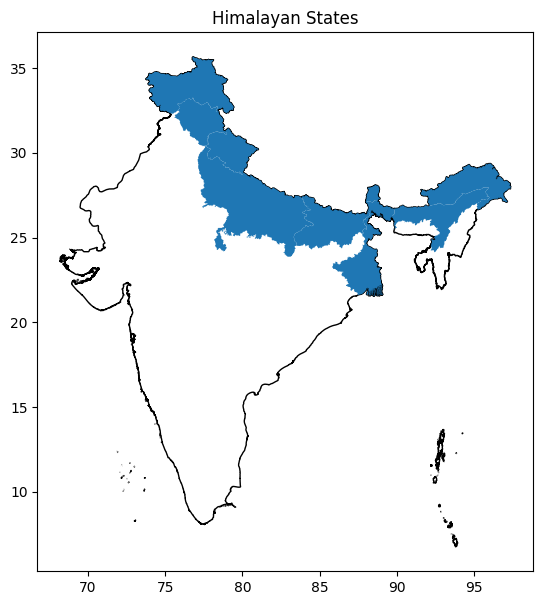

In [ ]:
# Creating plot of administrative boundaries of Himalayan states
fig, ax = plt.subplots(1, figsize=(13, 7))
ax.set_title('Himalayan States')
plot_boundary(ind_df, ax)
for state_df in state_dfs:
    state_name = state_df['name'].iloc[0]
    state_df.plot(ax=ax, label=state_name)

plt.show()

#3. BIODIVERSIY HOTSPOTS

In [ ]:
## Loading the global biodiversity hotspots data
bio_hotspot = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson")


# Read geojson file into a geodataframe
bio_hotspot_df = gpd.read_file(bio_hotspot)
bio_hotspot_df.head(5)

,OBJECTID,NAME,Type,Shape_Length,Shape_Area,geometry
0,1,Chilean Winter Rainfall and Valdivian Forests,hotspot area,200.706891,40.754665,"MULTIPOLYGON (((-74.59792 -46.92502, -74.61111..."
1,2,Chilean Winter Rainfall and Valdivian Forests,outer limit,191.174978,186.085694,"POLYGON ((-70.30946 -22.96028, -70.48596 -22.7..."
2,3,Cape Floristic Region,hotspot area,93.790123,7.610383,"MULTIPOLYGON (((23.08672 -34.07310, 23.08538 -..."
3,4,Maputaland-Pondoland-Albany,hotspot area,49.631419,25.366584,"MULTIPOLYGON (((24.48767 -34.10045, 24.48800 -..."
4,5,New Caledonia,hotspot area,24.637100,1.646954,"MULTIPOLYGON (((167.46053 -22.71228, 167.46161..."


In [ ]:
# Get unique values in the "Name" column
unique_names = bio_hotspot_df['NAME'].unique()
for name in unique_names:
    print(name)
print("Number of unique items:", len(unique_names))

Chilean Winter Rainfall and Valdivian Forests
Cape Floristic Region
Maputaland-Pondoland-Albany
New Caledonia
Southwest Australia
Succulent Karoo
Forests of East Australia
Caucasus
Himalaya
Horn of Africa
Indo-Burma
Irano-Anatolian
Japan
Mountains of Central Asia
Mountains of Southwest China
Philippines
Western Ghats and Sri Lanka
California Floristic Province
Caribbean Islands
Madrean Pine-Oak Woodlands
Mesoamerica
North American Coastal Plain
New Zealand
Tumbes-Choco-Magdalena
East Melanesian Islands
Sundaland
Eastern Afromontane
Atlantic Forest
Polynesia-Micronesia
Guinean Forests of West Africa
Cerrado
Coastal Forests of Eastern Africa
Madagascar and the Indian Ocean Islands
Wallacea
Mediterranean Basin
Tropical Andes
Number of unique items: 36


In [ ]:
#Standardising the column names
bio_hotspot_df.columns = column_std(bio_hotspot_df)

#Clipping the dataset to retain data about only India
ind_bio_df = clip_df(bio_hotspot_df, ind_df)
ind_bio_df = ind_bio_df[['name', 'geometry']]

#Clipping the dataset to retain data about only Himalayan States

himalaya_bio_df = clip_df(ind_bio_df, all_states_df)



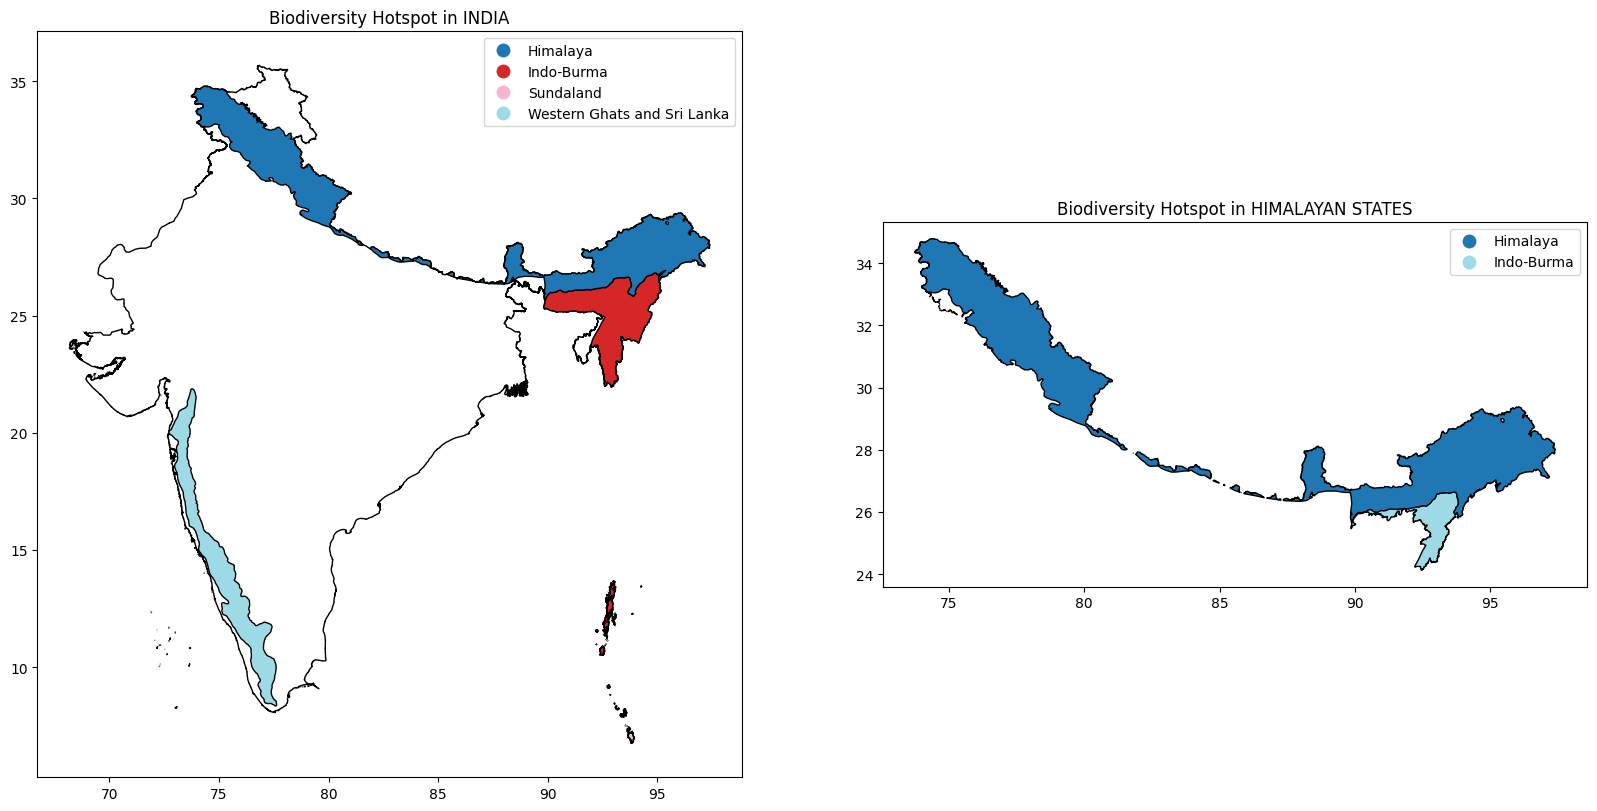

In [ ]:

#Plotting the biodiversity map of India
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.set_title('Biodiversity Hotspot in INDIA')
ax2.set_title('Biodiversity Hotspot in HIMALAYAN STATES')
plot_boundary(ind_df, ax1)
plot_feature(ind_bio_df, ax1, "name")
plot_feature(himalaya_bio_df, ax2, "name")
plt.show()




## 4. Global Ecological Zones

In [ ]:
## Loading the global ecological zones data
ind_GEZ = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Administrative/Boundaries/Level2 by Country/IND/IND_AL2_India_GEZ.json")
ind_GEZ= gpd.read_file(ind_GEZ)
ind_GEZ

,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel,geometry
0,IND,,India,Subtropical mountain system,25,SM,2,"MULTIPOLYGON (((93.38087 27.46374, 93.44117 27..."
1,IND,,India,Subtropical steppe,23,SBSh,2,"MULTIPOLYGON (((73.92919 34.30517, 73.92148 34..."
2,IND,,India,Temperate mountain system,35,TeM,2,"MULTIPOLYGON (((78.26877 34.63843, 78.26877 34..."
3,IND,,India,Tropical desert,15,TBWh,2,"MULTIPOLYGON (((69.25014 22.26431, 69.25014 22..."
4,IND,,India,Tropical dry forest,13,TAwb,2,"MULTIPOLYGON (((79.70680 10.28820, 79.70292 10..."
5,IND,,India,Tropical moist forest,12,TAwa,2,"MULTIPOLYGON (((73.45926 16.04566, 73.45924 16..."
6,IND,,India,Tropical mountain system,16,TM,2,"MULTIPOLYGON (((77.14367 10.22904, 77.14367 10..."
7,IND,,India,Tropical rainforest,11,TAr,2,"MULTIPOLYGON (((93.78876 6.90034, 93.78876 6.9..."
8,IND,,India,Tropical shrubland,14,TBSh,2,"MULTIPOLYGON (((77.55412 8.07834, 77.55416 8.0..."


In [ ]:
# Checking the shape of global ecological zones datasets
ind_GEZ.shape

(9, 8)

In [ ]:
# List of global ecological zones
print(ind_GEZ["gez_name"])

0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
Name: gez_name, dtype: object


In [ ]:
# Loading the global ecological zones data for the all the Himalayan States

hima_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Himachal Pradesh_GEZ.json")
hima_gez_df= gpd.read_file(hima_gez_df)

aruna_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Arunachal Pradesh_GEZ.json")
aruna_gez_df= gpd.read_file(aruna_gez_df)

JK_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Jammu and Kashmir_GEZ.json")
JK_gez_df = gpd.read_file(JK_gez_df )

uttra_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttarakhand_GEZ.json")
uttra_gez_df = gpd.read_file(uttra_gez_df)

sikkim_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Sikkim_GEZ.json")
sikkim_gez_df = gpd.read_file(sikkim_gez_df)

assam_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Assam_GEZ.json")
assam_gez_df = gpd.read_file(assam_gez_df)

bihar_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Bihar_GEZ.json")
bihar_gez_df = gpd.read_file(bihar_gez_df)

west_beng_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_West Bengal_GEZ.json")
west_beng_gez_df = gpd.read_file(west_beng_gez_df)

UP_gez_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/Global_Ecological_Zone_GEZ/byStateGEZ/IND/IND_AL4_Uttar Pradesh_GEZ.json")
UP_gez_df = gpd.read_file(UP_gez_df)



In [ ]:
# Joining all the satewise datasets in to one df
state_gez_dfs = [hima_gez_df, aruna_gez_df, JK_gez_df,uttra_gez_df,sikkim_gez_df,assam_gez_df,UP_gez_df, bihar_gez_df, west_beng_gez_df ]
all_states_gez_df = pd.concat(state_gez_dfs)

In [ ]:
#Standardising the column names
ind_GEZ.columns = column_std(ind_GEZ)
ind_gez_df = ind_GEZ[['gez_name', 'geometry']]

#Clipping the dataset to retain data about only India and Himalayan states
all_states_gez_df.columns = column_std(all_states_gez_df)
all_states_gez_df = all_states_gez_df[['gez_name', 'geometry']]


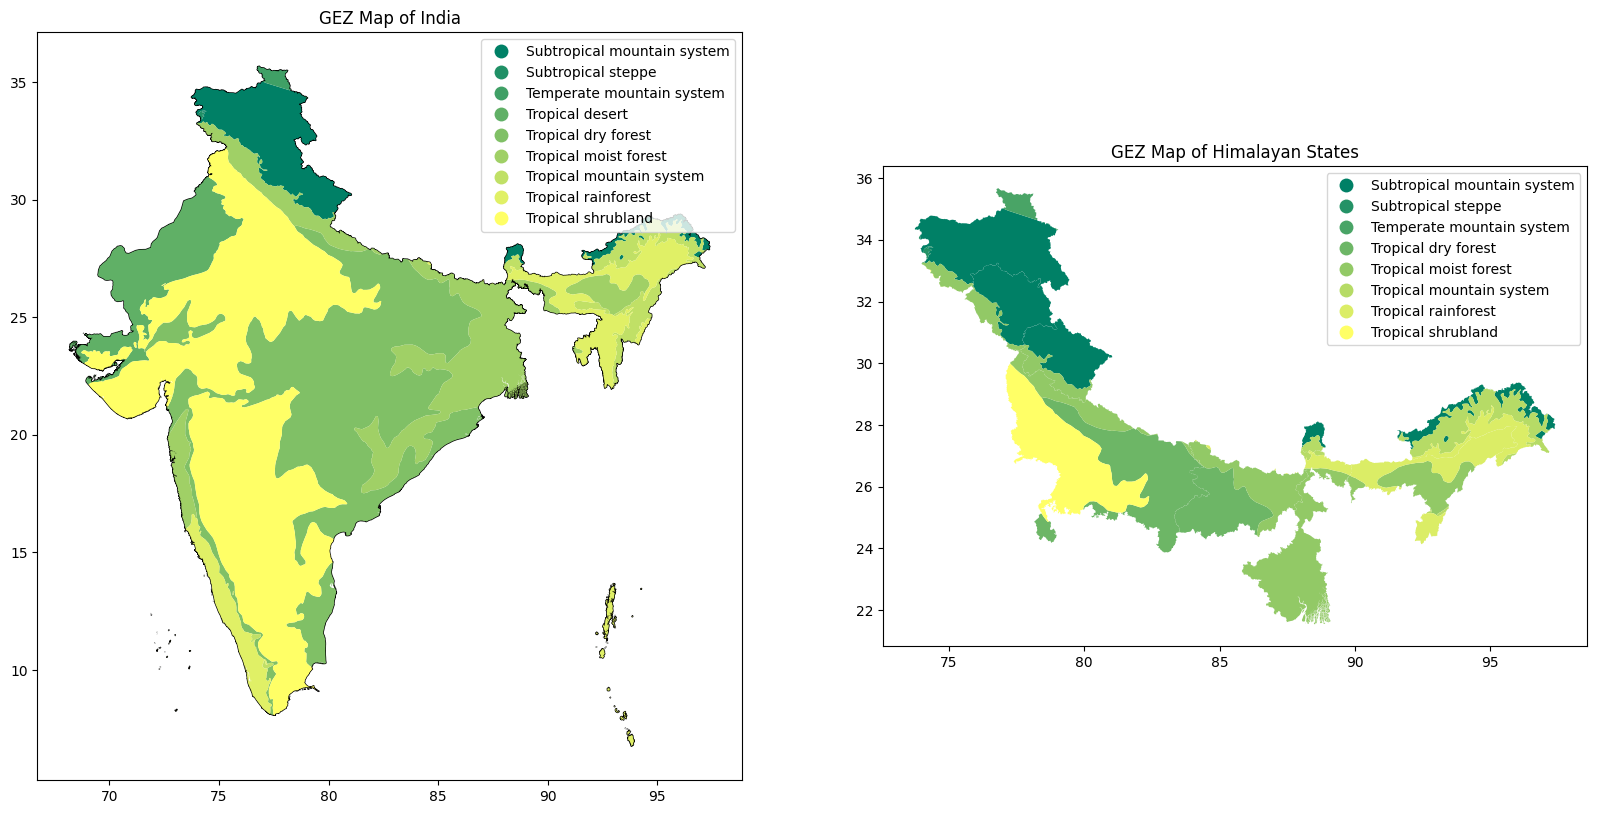

In [ ]:
# Plotting the global ecological zones in India and Himalayan States
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15));
plot_boundary(ind_df, ax1)
ind_GEZ.plot(ax=ax1, column='gez_name', cmap = 'summer', legend=True)
all_states_gez_df.plot(ax=ax2, column='gez_name', cmap = 'summer', legend=True)
ax1.set_title("GEZ Map of India")
ax2.set_title("GEZ Map of Himalayan States")
plt.show()

# 5. Soil Resources

In [ ]:
# Loading the Soil Resources data for India
ind_soil_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Soil/World Soil Resources/byCountry/IND_AL2_India_WSR.json")
# Read geojson file into a geodataframe
ind_soil_df = gpd.read_file(ind_soil_df)
ind_soil_df

,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel,geometry
0,IND,,India,AC,23,Acrisol,2,"MULTIPOLYGON (((92.56884 10.80253, 92.56764 10..."
1,IND,,India,AR,3,Arenosol,2,"MULTIPOLYGON (((69.62064 24.26911, 69.61684 24..."
2,IND,,India,CL,29,Calcisol,2,"MULTIPOLYGON (((68.89517 24.25835, 68.89476 24..."
3,IND,,India,CM,2,Cambisol,2,"MULTIPOLYGON (((88.33736 26.47869, 88.33716 26..."
4,IND,,India,FL,20,Fluvisol,2,"MULTIPOLYGON (((91.37963 23.14395, 91.32592 23..."
5,IND,,India,GL,7,Gleysol,2,"MULTIPOLYGON (((79.84619 10.99522, 79.84034 11..."
6,IND,,India,LP,18,Leptosol,2,"MULTIPOLYGON (((92.27997 23.62525, 92.28014 23..."
7,IND,,India,LV,12,Luvisol,2,"POLYGON ((79.53611 23.75667, 79.66603 23.76530..."
8,IND,,India,LX,6,Lixisol,2,"MULTIPOLYGON (((82.35429 16.85383, 82.35434 16..."
9,IND,,India,NT,24,Nitisol,2,"MULTIPOLYGON (((76.97561 8.38579, 76.97553 8.3..."


In [ ]:
#Standardising columns
ind_soil_df.columns = column_std(ind_soil_df)
ind_soil_df = ind_soil_df[['ipcc', 'geometry']]

#Clipping the dataset to retain data about only Himalayan States
himalaya_soil_df = clip_df(ind_soil_df, all_states_df)

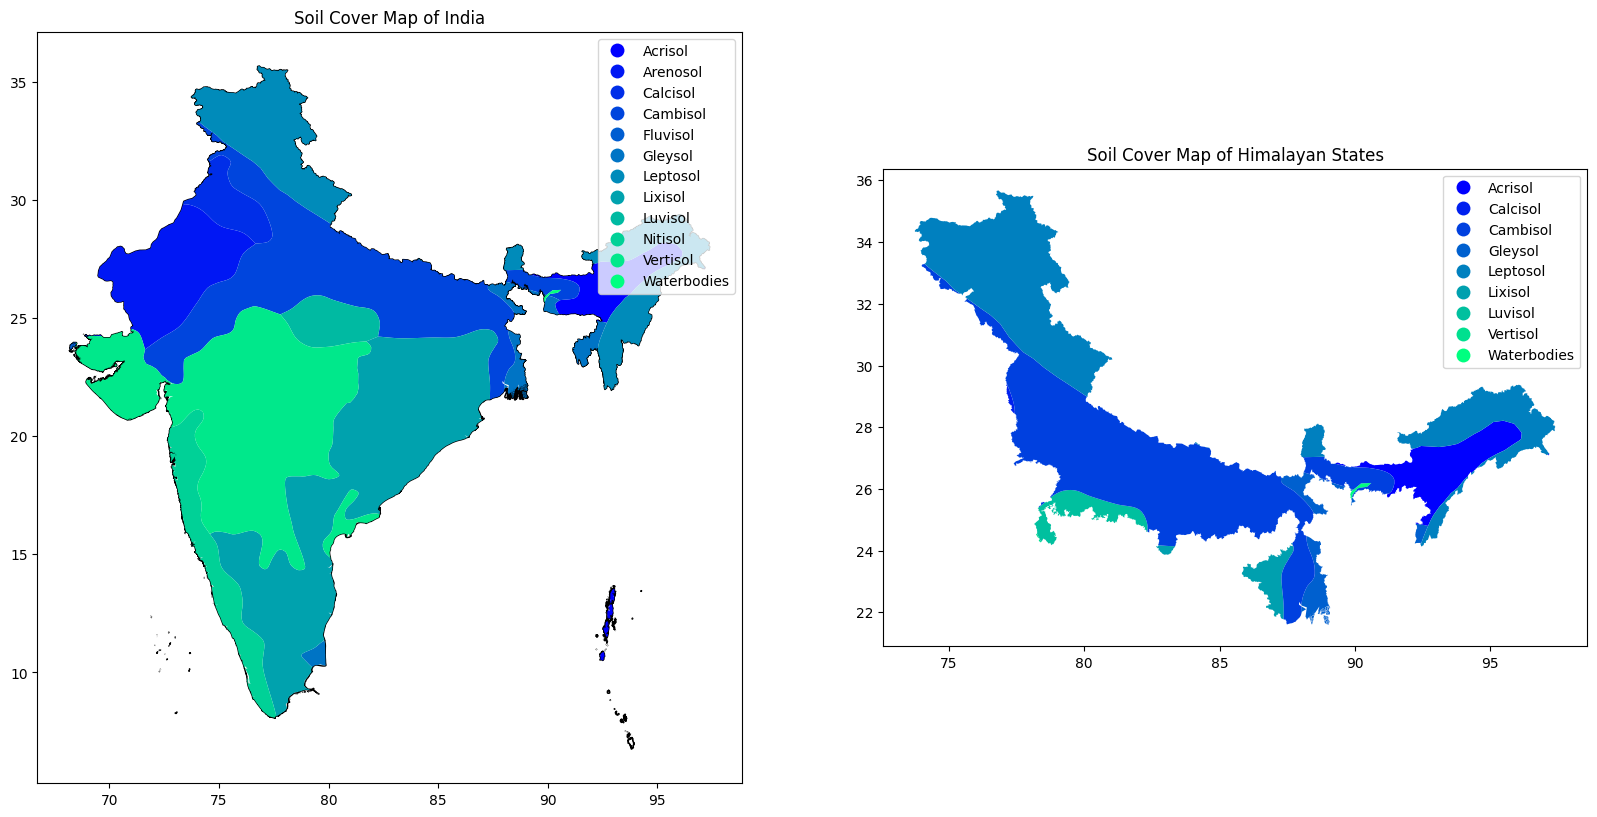

In [ ]:
# Plotting the soil cover map of India and Himalayan states

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15));
plot_boundary(ind_df, ax1)
ind_soil_df.plot(ax=ax1, column='ipcc', cmap = 'winter', legend=True)
himalaya_soil_df.plot(ax=ax2, column='ipcc', cmap = 'winter', legend=True)
ax1.set_title("Soil Cover Map of India")
ax2.set_title("Soil Cover Map of Himalayan States")
plt.show()

# 6. Agro-Ecological Zones

In [ ]:
# Loading the Agro-Ecological data for India
ageco_df = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson")
# Read geojson file into a geodataframe
ageco_df = gpd.read_file(ageco_df)
ageco_df

,Value,geometry
0,1,"POLYGON ((-33.50000 83.65000, -33.50000 83.500..."
1,1,"POLYGON ((-37.85000 83.60000, -37.85000 83.500..."
2,1,"POLYGON ((-32.35000 83.60000, -32.35000 83.500..."
3,1,"POLYGON ((-31.25000 83.60000, -31.25000 83.500..."
4,1,"POLYGON ((-34.25000 83.60000, -34.25000 83.500..."
...,...,...
116670,2,"POLYGON ((-69.50000 -55.65000, -69.50000 -55.7..."
116671,1,"POLYGON ((-67.50000 -55.65000, -67.50000 -55.7..."
116672,2,"POLYGON ((-69.40000 -55.75000, -69.40000 -55.8..."
116673,2,"POLYGON ((-67.65000 -55.40000, -67.65000 -55.5..."


In [ ]:
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid',
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils',
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils',
          '9': 'Moist, good soils', '10': 'Moist, moderate soils',
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils',
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils',
          '15': 'Humid, good soils', '16': 'Humid, moderate soils',
          '17': 'Humid, poor soils', '18': 'Water'}

# # normalizing column name
ageco_df.rename(columns={'Value': 'value'}, inplace=True)

# using defined values and replacing them to the corresponding codes
ageco_df.value = ageco_df.value.astype('str').replace(values)

In [ ]:
#Clipping the datasets to retain data about only India
agroecological_ind_df  = ageco_df.clip(ind_df)

#Clipping the dataset to retain data about only Himalayan States
himalaya_agroecological_df = clip_df(agroecological_ind_df, all_states_df)
himalaya_agroecological_df

,value,geometry
80394,"Humid, moderate soils","POLYGON ((87.35000 21.85000, 87.45000 21.85000..."
80225,Irrigated Soils,"MULTIPOLYGON (((86.75000 22.15000, 86.75000 22..."
80272,"Humid, poor soils","MULTIPOLYGON (((88.98865 22.35000, 88.98880 22..."
80802,"Sub-humid, moderate soils","POLYGON ((86.85000 22.65000, 86.85000 22.60000..."
80055,"Humid, moderate soils","POLYGON ((87.65000 21.90000, 87.60000 21.90000..."
...,...,...
68388,"Humid, poor soils","POLYGON ((78.40000 34.10000, 78.35000 34.10000..."
68939,Water,"POLYGON ((78.65000 33.75000, 78.77017 33.75000..."
68794,Water,"POLYGON ((78.65000 33.75000, 78.60000 33.75000..."
68700,Water,"POLYGON ((78.60000 33.85000, 78.50000 33.85000..."


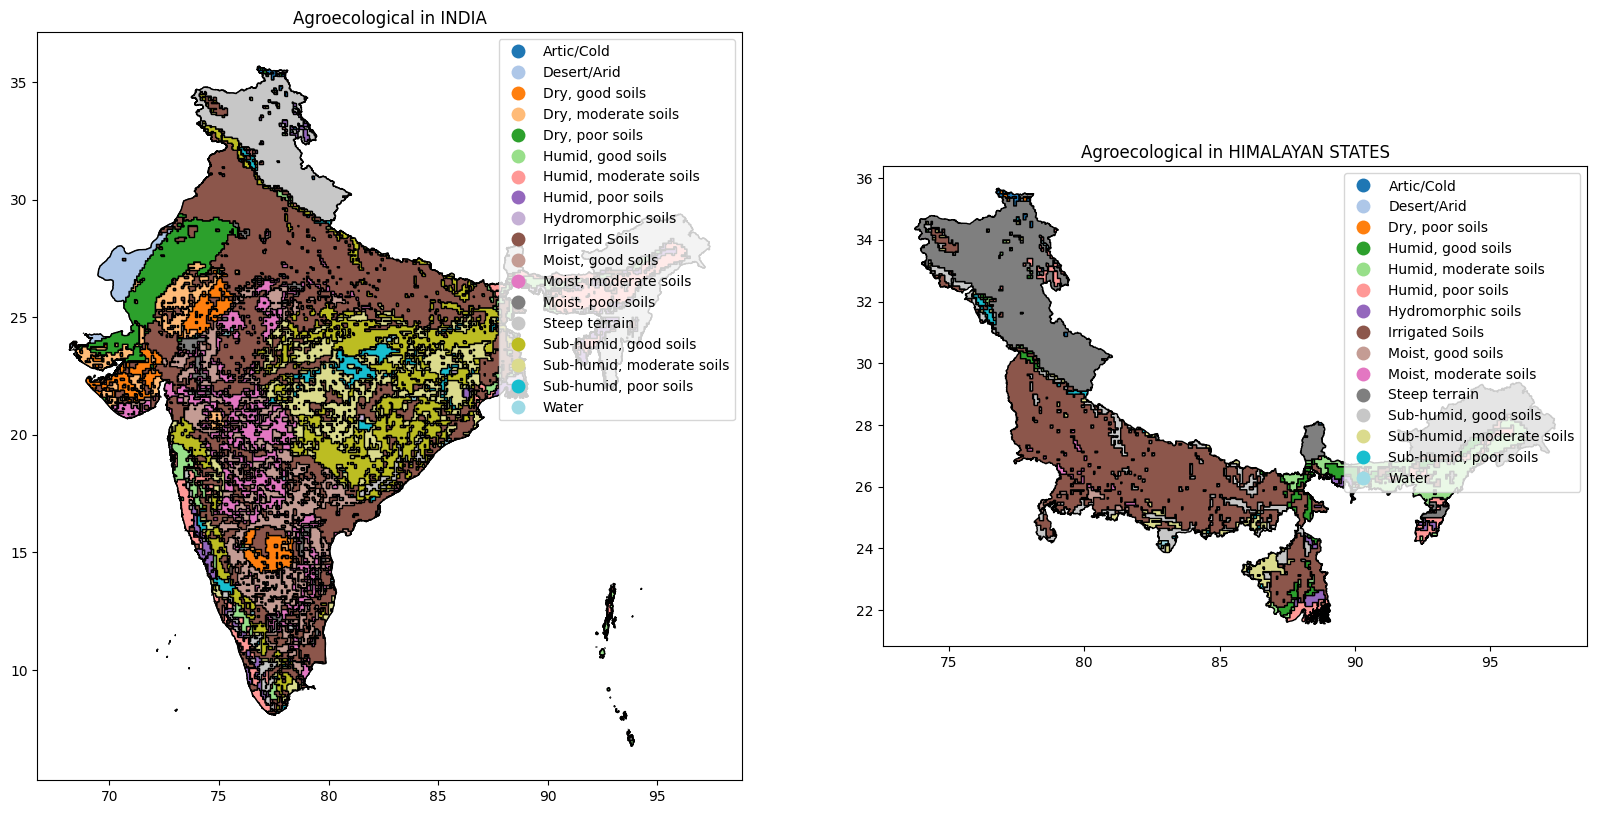

In [ ]:
#Plotting the Agro ecological zones of India and Himalayan States
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.set_title('Agroecological in INDIA')
ax2.set_title('Agroecological in HIMALAYAN STATES')
plot_boundary(agroecological_ind_df, ax1)
plot_feature(agroecological_ind_df, ax1, column='value')
plot_feature(himalaya_agroecological_df, ax2, column='value')
plt.show()

## 7. Holdridges Life Zones

In [ ]:
#Loading the global biodiversity hotspots data
holdridge_zones = (r"/content/drive/MyDrive/Outreachy_datasets/LandSectorDatasets/World_datasets/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json")
holdridge_zones_df = gpd.read_file(holdridge_zones)
holdridge_zones_df

,FID,AREA,PERIMETER,HOLDRIG_,HOLDRIG_ID,ZONE,CASE_,FREQUENCY,DESC,SYMBOL,geometry
0,0,240.50,173,2,3695,1,2,13,Ice,5,"POLYGON ((-61.00000 81.00000, -61.50000 81.000..."
1,1,1.25,6,3,110,2,3,232,Polar desert,5,"POLYGON ((-80.50000 83.00000, -81.00000 83.000..."
2,2,49.75,72,4,107,1,2,13,Ice,5,"POLYGON ((-80.50000 83.00000, -80.50000 82.500..."
3,3,0.25,2,5,108,2,3,232,Polar desert,5,"POLYGON ((-80.00000 83.00000, -80.00000 82.500..."
4,4,0.25,2,6,109,2,3,232,Polar desert,5,"POLYGON ((-73.50000 83.00000, -73.50000 82.500..."
...,...,...,...,...,...,...,...,...,...,...,...
4826,4826,1.00,5,4828,3591,2,3,232,Polar desert,5,"POLYGON ((-36.00000 -55.00000, -36.00000 -54.5..."
4827,4827,0.25,2,4829,3583,5,6,241,Polar wet tundra,3,"POLYGON ((-70.50000 -54.50000, -70.50000 -55.0..."
4828,4828,0.50,3,4830,3584,2,3,232,Polar desert,5,"POLYGON ((-70.00000 -54.50000, -70.00000 -55.0..."
4829,4829,0.25,2,4831,3586,10,11,254,Boreal wet forest,20,"POLYGON ((-66.00000 -54.50000, -66.00000 -55.0..."


In [ ]:
#Clipping the datasets to retain data about only India
holdridge_ind_df = holdridge_zones_df.clip(ind_df)

#Clipping the dataset to retain data about only Himalayan States
himalaya_holdridge_df = clip_df(holdridge_ind_df, all_states_df)

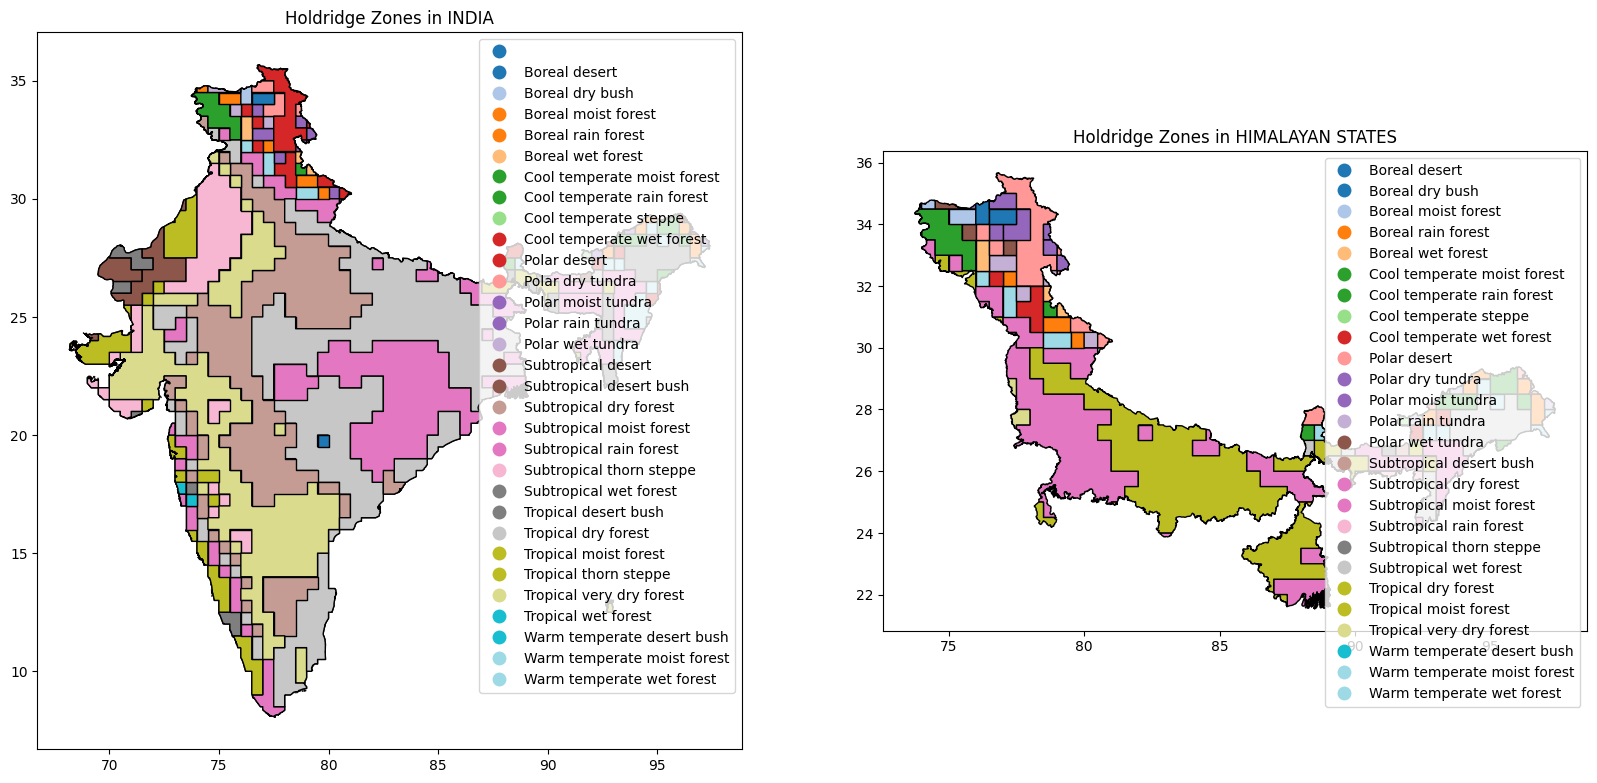

In [ ]:
#Plotting the biodiversity map of India
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 15))
ax1.set_title('Holdridge Zones in INDIA')
ax2.set_title('Holdridge Zones in HIMALAYAN STATES')
plot_boundary(holdridge_ind_df, ax1)
plot_feature(holdridge_ind_df, ax1,  column='DESC')
plot_feature(himalaya_holdridge_df, ax2,  column='DESC')
plt.show()